<a href="https://colab.research.google.com/github/leesm0409/bootcamp/blob/main/08_(1)%EC%BB%A8%EB%B2%8C%EB%A3%A8%EC%85%98_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9D%84_%EC%9D%B4%EC%9A%A9%ED%95%9C_Fashion_MNIST_0_9_%EC%9D%98%EB%A5%98_%EC%98%88%EC%B8%A1%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#컨벌루션 신경망(CNN)을 이용한  Fashion MNIST 0-9 의류 예측하기

## 데이터 준비하기

In [ ]:
from keras.datasets.fashion_mnist import load_data

#케라스 저장소에서 데이터 다운로드
(X_train, y_train), (X_test, y_test) = load_data()
print('X_train.shape ', X_train.shape)
print('X_test.shape ', X_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
X_train.shape  (60000, 28, 28)
X_test.shape  (10000, 28, 28)


## 데이터 전처리

*   데이터 : 스케일링 (범위 축소, 0 ~ 1)
*   레이블 : 범주형으로 변경


In [ ]:
# 값의 범위를 0 ~ 255 -> minMax 알고리즘을 사용 0~1 범위 축소
X_train = X_train/255
X_test = X_test/255

In [ ]:
from keras.utils import to_categorical

# 실제 정답 비교를 위해 0 ~ 9 라벨링된 데이터 따로 저장
real_y_test = y_test

# 각 데이터의 레이블을 범주형으로 변경
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print('real_y_tset[0]', real_y_test[0])
print('y_test[0]',y_test[0])

real_y_tset[0] 9
y_test[0] [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## 검증 데이터셋 분리

In [ ]:
from sklearn.model_selection import train_test_split
# 훈련 데이터셋(70%), 검증 데이터셋(30%)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=7)

print('X_train.shape',X_train.shape)
print('X_val.shape',X_val.shape)

X_train.shape (42000, 28, 28)
X_val.shape (18000, 28, 28)


### CNN 모델 구성하기

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=3,strides=(1,1), padding='same', activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))

model.add(Conv2D(filters=32, kernel_size=3,strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2, padding='same'))

model.add(Conv2D(filters=64, kernel_size=3,strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2, padding='same'))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax')) #10개로 최종 출력, softmax

## 모델 설정하기

In [ ]:
model.compile(optimizer='adam', # 옵티마이저
              loss='categorical_crossentropy', # 손실함수
              metrics=['acc']) # 모니터링 할 평가지표

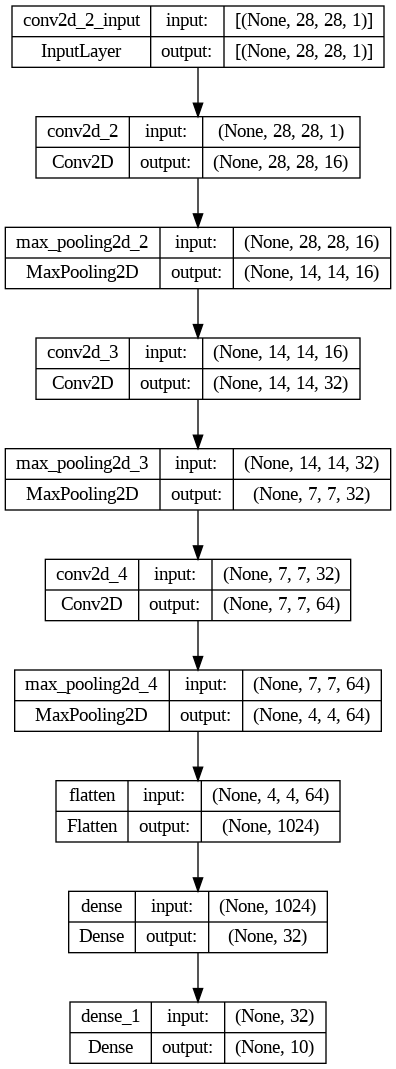

In [ ]:
from keras.utils import plot_model

plot_model(model, 'model.png' ,show_shapes=True)

## 모델 학습하기

In [ ]:
history = model.fit(X_train, y_train,
          epochs = 30,
          batch_size = 32,
          validation_data = (X_val, y_val))

Epoch 1/30
1313/1313 [==============================] - 18s 6ms/step - loss: 0.5221 - acc: 0.8092 - val_loss: 0.3462 - val_acc: 0.8768
Epoch 2/30
1313/1313 [==============================] - 7s 6ms/step - loss: 0.3333 - acc: 0.8792 - val_loss: 0.2971 - val_acc: 0.8936
Epoch 3/30
1313/1313 [==============================] - 8s 6ms/step - loss: 0.2866 - acc: 0.8955 - val_loss: 0.2784 - val_acc: 0.8961
Epoch 4/30
1313/1313 [==============================] - 7s 5ms/step - loss: 0.2569 - acc: 0.9066 - val_loss: 0.2895 - val_acc: 0.8951
Epoch 5/30
1313/1313 [==============================] - 7s 6ms/step - loss: 0.2353 - acc: 0.9143 - val_loss: 0.2548 - val_acc: 0.9078
Epoch 6/30
1313/1313 [==============================] - 7s 5ms/step - loss: 0.2151 - acc: 0.9199 - val_loss: 0.2363 - val_acc: 0.9113
Epoch 7/30
1313/1313 [==============================] - 7s 6ms/step - loss: 0.1968 - acc: 0.9285 - val_loss: 0.2358 - val_acc: 0.9136
Epoch 8/30
1313/1313 [==============================] - 7s 5m

## 학습 결과 분석

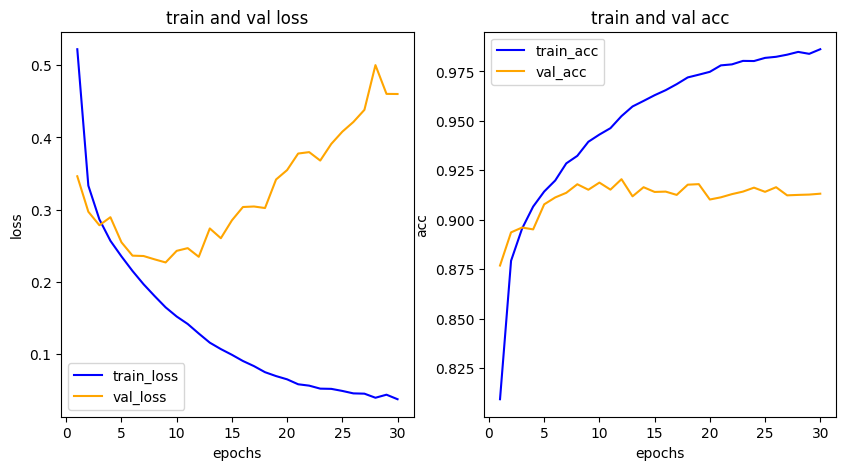

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.5207 - acc: 0.9078


[0.5206955671310425, 0.907800018787384]